In [1]:
#importing Libraries
import pandas as pd
import numpy as np

#importing Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loding train Dataset
ds1=pd.read_excel('Data_Train.xlsx')
ds1=pd.DataFrame(ds1)
ds_tr=ds1.copy()

#Loding test Dataset
ds2=pd.read_excel('Data_Test.xlsx')
ds2=pd.DataFrame(ds2)
ds_te=ds2.copy()

In [3]:
#looking at dataset

print(ds_tr.shape)
ds_tr.head()

(12690, 9)


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

In [4]:
#printing number of unique Values

print('TITLE:', ds_tr['TITLE'].nunique())
print('RESTAURANT_ID:', ds_tr['RESTAURANT_ID'].nunique())
print('TIME:', ds_tr['TIME'].nunique())
print('CITY:', ds_tr['CITY'].nunique())
print('LOCALITY', ds_tr['LOCALITY'].nunique())
print('RATING', ds_tr['RATING'].nunique())
print('VOTES', ds_tr['VOTES'].nunique())
print('CUISINES', ds_tr['CUISINES'].nunique())

TITLE: 113
RESTAURANT_ID: 11892
TIME: 2689
CITY: 359
LOCALITY 1416
RATING 32
VOTES 1847
CUISINES 4155


Here we see that we can drop RESTAURANT_ID feature

In [5]:
#dropping unecessary column
ds_tr=ds_tr.drop(['RESTAURANT_ID'],axis=1)

ds_te=ds_te.drop(['RESTAURANT_ID'],axis=1)

In [6]:
#Checking info of dataset

ds_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   TIME      12690 non-null  object
 3   CITY      12578 non-null  object
 4   LOCALITY  12592 non-null  object
 5   RATING    12688 non-null  object
 6   VOTES     11486 non-null  object
 7   COST      12690 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 793.2+ KB


we need to  remove vote string from votes column to make it dtype float 

we need to seprate different type of cousine as they are written in same column

we need to seprate different title as they are written in same column





# Null Values

In [7]:
#Checking Null Values

#Train Data
print('Train')
print(ds_tr.isnull().sum())
print()

#Test Data
print('Test')
print(ds_te.isnull().sum())

Train
TITLE          0
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

Test
TITLE         0
CUISINES      0
TIME          0
CITY         35
LOCALITY     30
RATING        2
VOTES       402
dtype: int64


as city and locality are releated to each other like locality depend on city so we cannot use mode method and fill any city or column name annomsly, so we will fill them with Unkown

we will fill rating with mean value and votes with 0

# Data Pre-Processing

In [8]:
ds_tr["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [9]:
#Converting rating data type to float
#train
ds_tr['RATING'] = ds_tr['RATING'].str.replace('NEW', '0')
ds_tr['RATING'] = ds_tr['RATING'].str.replace('-', '0')
ds_tr['RATING'] = ds_tr['RATING'].astype('float')
#test
ds_te['RATING'] = ds_te['RATING'].str.replace('NEW', '0')
ds_te['RATING'] = ds_te['RATING'].str.replace('-', '0')
ds_te['RATING'] = ds_te['RATING'].astype('float')

Removing votes from VOTES Feature

In [10]:
#Filling NaN to 0

#Train
ds_tr['VOTES'].fillna('0' ,inplace=True)

#Test
ds_te['VOTES'].fillna('0' ,inplace=True)

#Train
# split the string into a list 
ds_tr["VOTES"] = ds_tr["VOTES"].str.split()

#extract the first element of the list and convert it into an integer
ds_tr["VOTES"] = ds_tr["VOTES"].str[0].astype("int")

#Test
# split the string into a list 
ds_te["VOTES"] = ds_te["VOTES"].str.split()

#extract the first element of the list and convert it into an integer
ds_te["VOTES"] = ds_te["VOTES"].str[0].astype("int")

#making copy of dataset
ds_vs=ds_tr.copy()

# Seprating Different CUISINES  into different columns

Train Dataset

In [11]:
#making list of columns
cuisines = list(ds_tr['CUISINES'])

#making 8 empty list as there are 8 different type of couisins
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []

#here we are generating for loop of different index if at that index any sting is not availabl then we put None there
for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip())
        except :
            C1.append('None')
        try :
            C2.append(i.split(',')[1].strip())
        except :
            C2.append('None')
        try :
            C3.append(i.split(',')[2].strip())
        except :
            C3.append('None')
        try :
            C4.append(i.split(',')[3].strip())
        except :
            C4.append('None')
        try :
            C5.append(i.split(',')[4].strip())
        except :
            C5.append('None')
        try :
            C6.append(i.split(',')[5].strip())
        except :
            C6.append('None')
        try :
            C7.append(i.split(',')[6].strip())
        except :
            C7.append('None')
        try :
            C8.append(i.split(',')[7].strip())
        except :
            C8.append('None')

#Putting those city back to dataset
ds_tr['CUISINE1'] = C1
ds_tr['CUISINE2'] = C2
ds_tr['CUISINE3'] = C3
ds_tr['CUISINE4'] = C4
ds_tr['CUISINE5'] = C5
ds_tr['CUISINE6'] = C6
ds_tr['CUISINE7'] = C7
ds_tr['CUISINE8'] = C8

#Dropping Cuisines Columns as now it is of no use
ds_tr=ds_tr.drop(['CUISINES'],axis=1)

Test DataSet

In [12]:
#making list of columns
cuisines = list(ds_te['CUISINES'])

#making 8 empty list as there are 8 different type of couisins
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []

#here we are generating for loop of different index if at that index any sting is not availabl then we put None there
for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip())
        except :
            C1.append('None')
        try :
            C2.append(i.split(',')[1].strip())
        except :
            C2.append('None')
        try :
            C3.append(i.split(',')[2].strip())
        except :
            C3.append('None')
        try :
            C4.append(i.split(',')[3].strip())
        except :
            C4.append('None')
        try :
            C5.append(i.split(',')[4].strip())
        except :
            C5.append('None')
        try :
            C6.append(i.split(',')[5].strip())
        except :
            C6.append('None')
        try :
            C7.append(i.split(',')[6].strip())
        except :
            C7.append('None')
        try :
            C8.append(i.split(',')[7].strip())
        except :
            C8.append('None')

#Putting those city back to dataset
ds_te['CUISINE1'] = C1
ds_te['CUISINE2'] = C2
ds_te['CUISINE3'] = C3
ds_te['CUISINE4'] = C4
ds_te['CUISINE5'] = C5
ds_te['CUISINE6'] = C6
ds_te['CUISINE7'] = C7
ds_te['CUISINE8'] = C8

#Dropping Cuisines Columns as now it is of no use
ds_te=ds_te.drop(['CUISINES'],axis=1)

# Seprating Different Title into different columns

In [13]:
#Train Datase

#making list of column
titles = list(ds_tr['TITLE'])


#making 8 empty list as there are 8 different type of couisins
T1 = []
T2 = []

#here we are generating for loop of different index if at that index any sting is not availabl then we put None there
for i in titles:
    T1.append(i.split(',')[0].strip())
    try :
         T2.append(i.split(',')[1].strip())
    except :
         T2.append('NONE')

#Putting those city back to dataset
ds_tr['TITLE1'] = T1
ds_tr['TITLE2'] = T2

#Test Dataset

#making list of column
titles = list(ds_te['TITLE'])


#making 8 empty list as there are 8 different type of couisins
T1 = []
T2 = []

#here we are generating for loop of different index if at that index any sting is not availabl then we put None there
for i in titles:
    T1.append(i.split(',')[0].strip())
    try :
         T2.append(i.split(',')[1].strip())
    except :
         T2.append('NONE')

#Putting those city back to dataset
ds_te['TITLE1'] = T1
ds_te['TITLE2'] = T2

#Dropping Cuisines Columns as now it is of no use
ds_tr=ds_tr.drop(['TITLE'],axis=1) #train
ds_te=ds_te.drop(['TITLE'],axis=1) #test

In [14]:
#Describing Dataset

ds_tr.describe()

,RATING,VOTES,COST
count,12688.000000,12690.000000,12690.000000
mean,3.426836,376.231127,655.252246
std,1.179107,810.946942,627.003540
min,0.000000,0.000000,20.000000
25%,3.400000,39.250000,300.000000
50%,3.800000,132.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


Minimum cost is rs. 20 while maximum is 14000 which can ce a possible outliers

while minimum votes are zero(which we gave to NaN values) and Maximum are 41186 which again ca be a possible outliers

# Data Analysis

# Univarient Analysis

In [15]:
ds_tr.head(1)

,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian,None,None,None,None,None,CASUAL DINING,NONE


(array([   20.,  1418.,  2816.,  4214.,  5612.,  7010.,  8408.,  9806.,
        11204., 12602., 14000.]),
 <a list of 11 Text major ticklabel objects>)

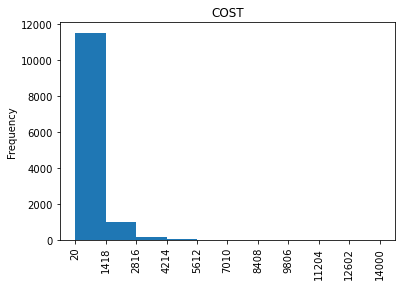

In [16]:
#Checking Freq. distrubtion of Cost Data

counts, bins_edges=np.histogram(ds_tr['COST'])
ds_tr['COST'].plot(kind='hist' , xticks= bins_edges)
plt.title("COST")
plt.xticks(rotation=90)

we see that moslty cost of restarunt is around 20-1418

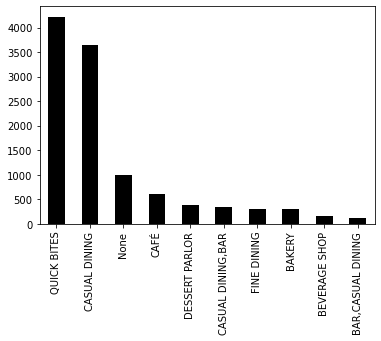

In [17]:
#Top 10 types of restraunt
ds1['TITLE'].value_counts()[:10].plot(kind='bar', color='black')


Quick bytes types of restraunts are more

Text(0.5, 1.0, 'RATING')

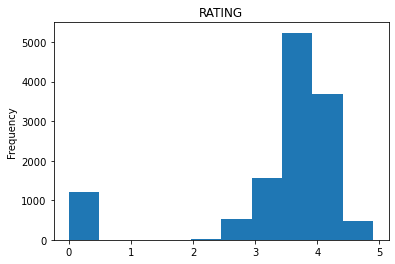

In [18]:
#Checking Freq. distrubtion of Rating Data

ds_tr['RATING'].plot(kind='hist', bins=10)
plt.title("RATING")

Most of the raiting are of range 3.7 to 4.1

Text(0.5, 1.0, 'RATING')

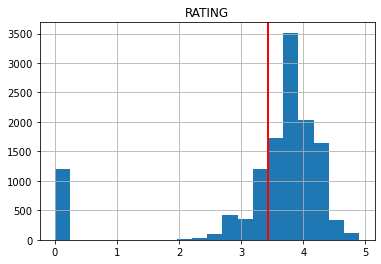

In [19]:
#mean of RATING

experience=ds_tr['RATING'].hist(bins=20)
mean_exp=np.mean(ds_tr['RATING'])
plt.axvline(mean_exp, linewidth=2, color='red', label='mean')
plt.title("RATING")

average raiting is 3.5

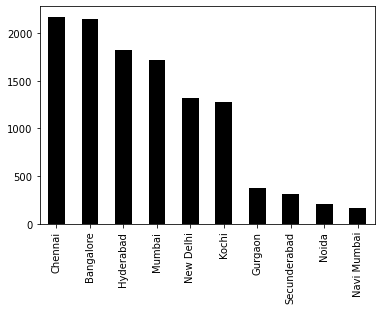

In [20]:
#Top 10 types of CITY
ds1['CITY'].value_counts()[:10].plot(kind='bar', color='black')

Chennai has most number of restraunts

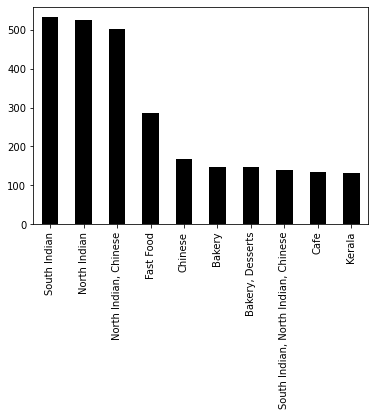

In [21]:
#Top 10 types of CUISINES
ds1['CUISINES'].value_counts()[:10].plot(kind='bar', color='black')

Most of the restraunts are south indian

# Bivarent Analysis

# EXPENSIVE

# Cuisines

                                            CUISINES    COST
0                       Italian, Mediterranean, Thai  7000.0
1          North Indian, Continental, Pizza, Italian  6000.0
2                     Japanese, Continental, Chinese  5500.0
3           Japanese, Italian, North Indian, Chinese  5500.0
4                       European, Continental, Asian  5000.0
5                        Chinese, Seafood, Beverages  5000.0
6  Italian, Thai, North Indian, Japanese, Mediter...  5000.0
7             European, Italian, North Indian, Asian  5000.0
8                     Mughlai, Biryani, North Indian  5000.0
9       Continental, North Indian, Chinese, Bar Food  5000.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

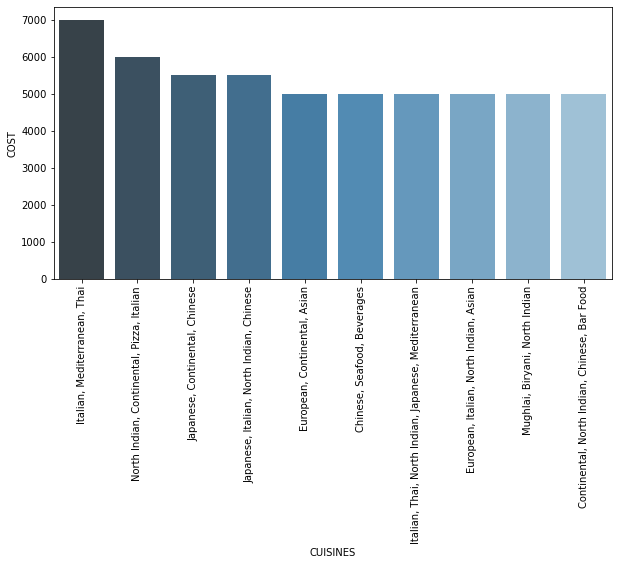

In [22]:
#Making dataset of cost of top 10 cuisines
t1=pd.pivot_table(ds1, values=["COST"], index=['CUISINES']).sort_values(by='COST', ascending=False)
t1=t1.head(10)
t1.reset_index(inplace=True)
print(t1)

#Plotting bar Graph to compare COST of different CUISINES
plt.figure(figsize=(10,5))
sns.barplot(x='CUISINES', y='COST', data=t1, palette="Blues_d")
plt.xticks(rotation=90)

# Cities

                      CITY         COST
0                Banglaore  3000.000000
1  Chennai Thousand Lights  2500.000000
2            Kerala 682304  2200.000000
3        Chennai Teynampet  2166.666667
4   Malleshwaram Bangalore  2000.000000
5                    Ulsoo  2000.000000
6    Chennai Mahabalipuram  1850.000000
7                  Gurgoan  1800.000000
8              Khar (west)  1700.000000
9              navi mumbai  1600.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

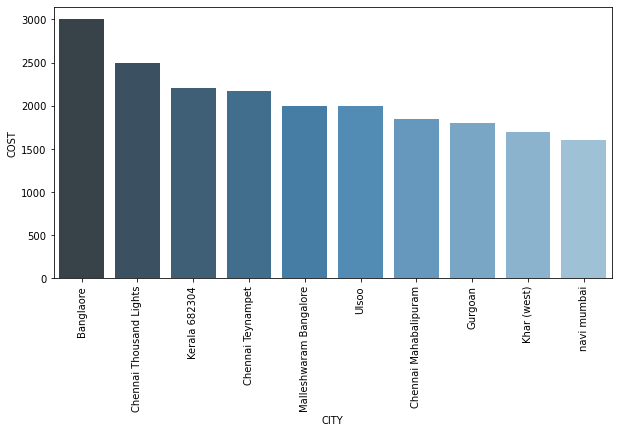

In [23]:
#Making dataset of cost of top 10 CITY
t1=pd.pivot_table(ds_vs, values=["COST",], index=['CITY']).sort_values(by='COST', ascending=False)
t1=t1.head(10)
t1.reset_index(inplace=True)
print(t1)

#Plotting bar Graph to compare COST of different CITY
plt.figure(figsize=(10,5))
sns.barplot(x='CITY', y='COST', data=t1, palette="Blues_d")
plt.xticks(rotation=90)

# Locality

                      LOCALITY         COST
0      Bandra Reclamation Dock  5000.000000
1       Dr. Zakir Hussain Marg  5000.000000
2                Mansingh Road  5000.000000
3           Bhikaji Cama Place  4500.000000
4               Aurangzeb Road  4500.000000
5  Mumbai Bandra Kurla Complex  3800.000000
6                  Sankey Road  3500.000000
7                   Lodhi Road  3333.333333
8        Opposite Inorbit Mall  3000.000000
9     Qutab Institutional Area  3000.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

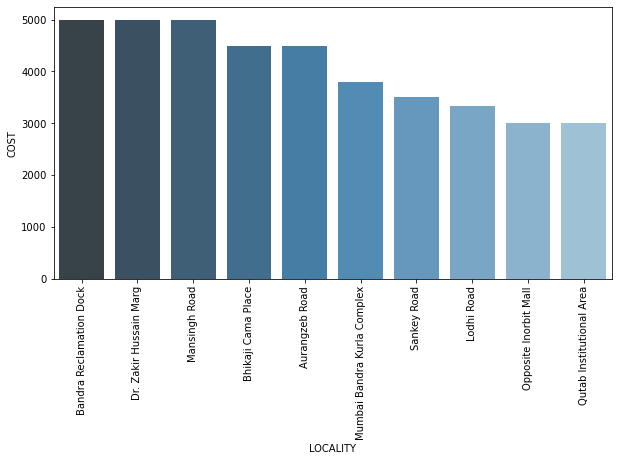

In [24]:
#Making dataset of cost of top 10 Locality
t1=pd.pivot_table(ds_vs, values=["COST",], index=['LOCALITY']).sort_values(by='COST', ascending=False)
t1=t1.head(10)
t1.reset_index(inplace=True)
print(t1)

#Plotting bar Graph to compare COST of different Locality
plt.figure(figsize=(10,5))
sns.barplot(x='LOCALITY', y='COST', data=t1, palette="Blues_d")
plt.xticks(rotation=90)

# RATING

# City

                                  CITY  RATING
0               Malleshwaram Bangalore     4.9
1          opp mukteshwar ashram powai     4.7
2                              chennai     4.7
3                          Hitech City     4.6
4                      Chennai 600034.     4.6
5            Beside Excellency Gardens     4.6
6      Bangalore Koramangala 7th Block     4.5
7               Dist. Center New Delhi     4.5
8  Chennai (Bang Opposite Indian Bank)     4.5
9                  Andheri west Mumbai     4.5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

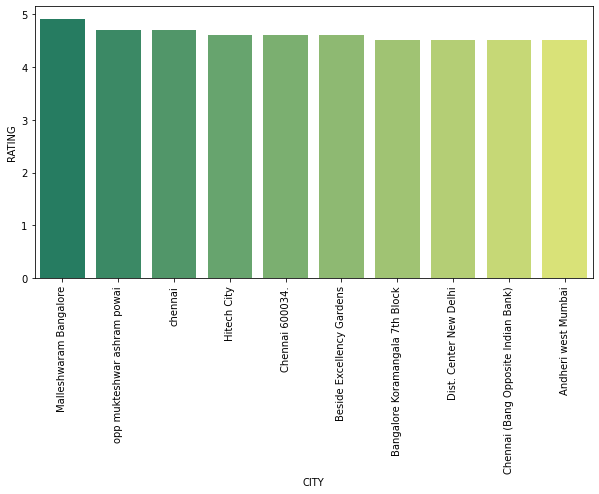

In [25]:
#Making dataset of cost of top 10 rated city
t1=pd.pivot_table(ds_vs, values=["RATING",], index=['CITY']).sort_values(by='RATING', ascending=False)
t1=t1.head(10)
t1.reset_index(inplace=True)
print(t1)

#Plotting bar Graph to compare rating of different CITY
plt.figure(figsize=(10,5))
sns.barplot(x='CITY', y='RATING', data=t1, palette="summer")
plt.xticks(rotation=90)

# Cuisines

                                            CUISINES  RATING
0  Seafood, Chinese, North Indian, Pizza, Contine...     4.9
1  Continental, North Indian, Italian, South Indi...     4.9
2         BBQ, North Indian, European, Mediterranean     4.9
3       Egyptian, Turkish, Lebanese, Moroccan, Greek     4.9
4         European, Mediterranean, North Indian, BBQ     4.9
5  North Indian, Fast Food, Italian, Asian, Conti...     4.9
6  Modern Indian, North Indian, Chinese, Momos, B...     4.9
7                                Fast Food, Bar Food     4.9
8   North Indian, Mediterranean, Asian, Arabian, BBQ     4.9
9  Continental, Mediterranean, Modern Indian, Mex...     4.8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

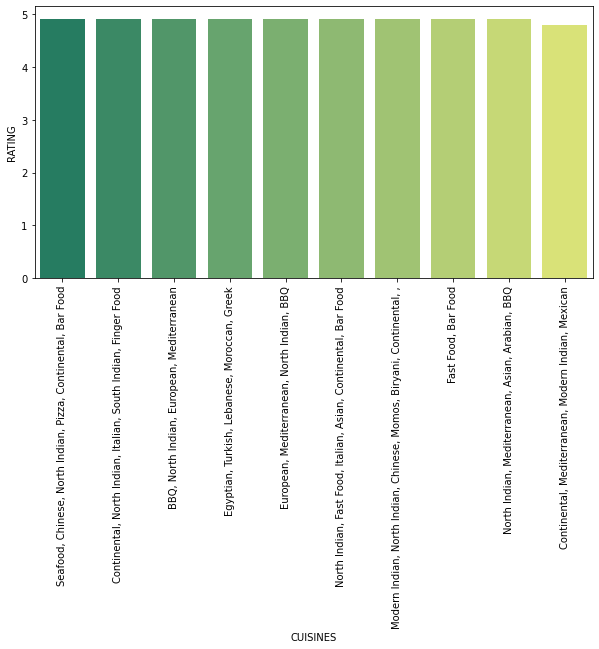

In [26]:
#Making dataset of cost of top 10 rated cuisines
t1=pd.pivot_table(ds_vs, values=["RATING",], index=['CUISINES']).sort_values(by='RATING', ascending=False)
t1=t1.head(10)
t1.reset_index(inplace=True)
print(t1)

#Plotting bar Graph to compare rating of different cuisines
plt.figure(figsize=(10,5))
sns.barplot(x='CUISINES', y='RATING', data=t1, palette="summer")
plt.xticks(rotation=90)

# Locality

                      LOCALITY  RATING
0       Brigade Gateway Campus    4.90
1            Near Basavanagudi    4.90
2                 nungambakkam    4.70
3        2nd Floor DLF Phase 3    4.70
4                    Shop no 3    4.70
5            Mind Space Centre    4.65
6         Off Race Course Road    4.60
7           North NCL Kompally    4.60
8  ITPL Main Road & Whitefield    4.50
9         Opposite Ansal Plaza    4.50


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

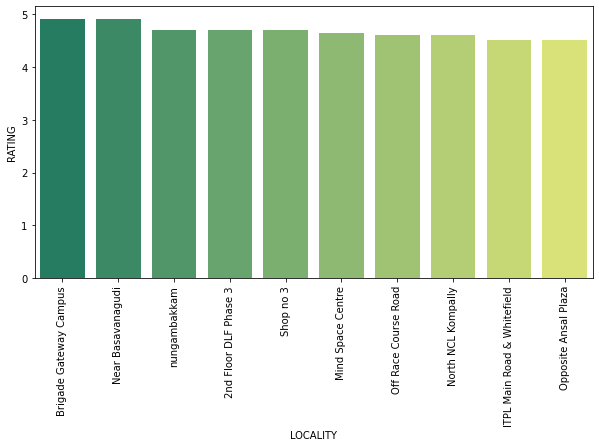

In [27]:
#Making dataset of cost of top 10 rated locality
t1=pd.pivot_table(ds_vs, values=["RATING",], index=['LOCALITY']).sort_values(by='RATING', ascending=False)
t1=t1.head(10)
t1.reset_index(inplace=True)
print(t1)

#Plotting bar Graph to compare rating of different locality
plt.figure(figsize=(10,5))
sns.barplot(x='LOCALITY', y='RATING', data=t1, palette="summer")
plt.xticks(rotation=90)

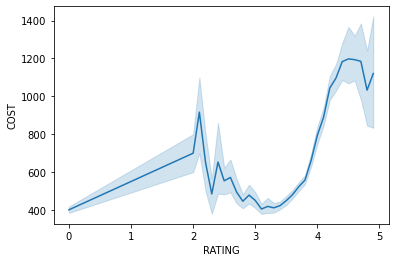

In [28]:
#Line Plot between cost and rating
sns.lineplot(x='RATING', y='COST', data=ds_tr)

we see that top rated restraunt are most expensive

# Correlation

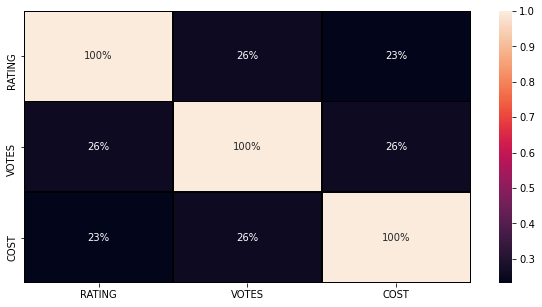

In [29]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(ds_tr.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.0%')

Raitings and Votes both have low correlation

# Missing Values

In [30]:
#Checking Null Values

#Train Data
print('Train')
print(ds_tr.isnull().sum())
print()

#Test Data
print('Test')
print(ds_te.isnull().sum())

Train
TIME          0
CITY        112
LOCALITY     98
RATING        2
VOTES         0
COST          0
CUISINE1      0
CUISINE2      0
CUISINE3      0
CUISINE4      0
CUISINE5      0
CUISINE6      0
CUISINE7      0
CUISINE8      0
TITLE1        0
TITLE2        0
dtype: int64

Test
TIME         0
CITY        35
LOCALITY    30
RATING       2
VOTES        0
CUISINE1     0
CUISINE2     0
CUISINE3     0
CUISINE4     0
CUISINE5     0
CUISINE6     0
CUISINE7     0
CUISINE8     0
TITLE1       0
TITLE2       0
dtype: int64


In [31]:
#Replacing NaN with Unknown and mean
#Train
ds_tr['CITY'].fillna("Unknown",inplace=True)
ds_tr['LOCALITY'].fillna("Unknown",inplace=True)
ds_tr['RATING'] = ds_tr.RATING.fillna(ds_tr.RATING.mean())
#Test
ds_te['CITY'].fillna("Unknown",inplace=True)
ds_te['LOCALITY'].fillna("Unknown",inplace=True)
ds_te['RATING'] = ds_te.RATING.fillna(ds_te.RATING.mean())

# Outliers

RATING       AxesSubplot(0.125,0.536818;0.133621x0.343182)
VOTES     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
dtype: object

<Figure size 864x432 with 0 Axes>

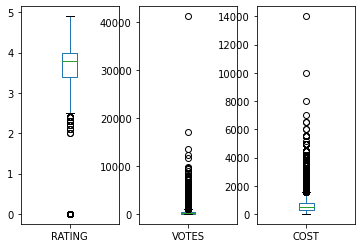

<Figure size 864x432 with 0 Axes>

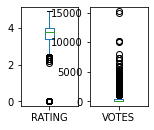

In [32]:
#Plotting Boxplot to see Outliers

#Training Datasets
plt.figure(figsize=(12,6))
ds_tr.plot(kind='box', subplots=True)

#Testing Datasets
plt.figure(figsize=(12,6))
ds_te.plot(kind='box', subplots=True, layout=(2,5))

we see outliers in both votes and cost but outliers in raitng are not outliers they are zero value which we intentionally put while removing NaN values

and as cost is our target variable so we are not going to touch that 

so we only going to treat votes outliers

In [33]:
#importing Zscore Library
from scipy import stats
from scipy.stats import zscore

#Applying Zscore to the columns with outliers
l1=['VOTES']
z=abs(zscore(ds_tr[l1]))

#printing all the data with zscore is greater than 3
print(np.where(z>3))

#removing all the rows having zscore greater than 3
ds_tr=ds_tr[(z<3).all(axis=1)]

(array([  186,   196,   293,   303,   304,   344,   354,   431,   510,
         775,   796,   852,   855,   872,   913,  1034,  1038,  1132,
        1147,  1151,  1244,  1346,  1467,  1476,  1522,  1540,  1617,
        1681,  1685,  1850,  2090,  2204,  2268,  2302,  2305,  2886,
        2905,  2977,  3028,  3033,  3289,  3333,  3398,  3408,  3507,
        3578,  3587,  3706,  3728,  3841,  3855,  3877,  3909,  3952,
        3974,  3987,  4124,  4150,  4192,  4193,  4268,  4367,  4470,
        4512,  4557,  4578,  4592,  4618,  4628,  4634,  4647,  4658,
        4691,  4709,  4760,  4768,  4855,  4947,  4987,  5078,  5140,
        5257,  5375,  5492,  5502,  5594,  5629,  5662,  5774,  5792,
        5836,  5880,  5897,  5969,  5996,  6005,  6142,  6390,  6421,
        6446,  6448,  6472,  6496,  6506,  6519,  6608,  6649,  6684,
        6690,  6714,  6760,  6878,  6922,  6982,  7028,  7034,  7059,
        7189,  7202,  7262,  7459,  7494,  7626,  7988,  7997,  8009,
        8123,  8400

# Skewness

In [34]:
#Checking Skewness

print('Train')
print(ds_tr.skew())
print()

Train
RATING   -2.205024
VOTES     2.548633
COST      4.098555
dtype: float64



In [35]:
#removing Skewness

#Training dataset
ds_tr['RATING']=np.sqrt(ds_tr['RATING'])
ds_tr['VOTES']=np.sqrt(ds_tr['VOTES'])

# Model Building

# Data Featuring

In [36]:
#Encoding columns with catagorical data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Label = ['TIME','CITY','LOCALITY', 'CUISINE1', 'CUISINE2', 'CUISINE3', 'CUISINE4', 'CUISINE5', 'CUISINE6', 'CUISINE7',
       'CUISINE8', 'TITLE1', 'TITLE2']

for i in Label:
    ds_tr[i] = le.fit_transform(ds_tr[i])
    ds_te[i] = le.fit_transform(ds_te[i])

# Standard Scaling

In [37]:
#Normalising
from sklearn.preprocessing import StandardScaler

#Making X and Y variables
x=ds_tr.drop('COST', axis=1)
y=ds_tr['COST']

#Standard Scaling
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
#testing Different Models
model=[LinearRegression(),SVR(), DecisionTreeRegressor(), KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print('R2 Score')
    print(r2_score(y_test,pred))
    print('MAE')
    print(mean_absolute_error(y_test,pred))
    print('MSE')
    print(mean_squared_error(y_test,pred))
    print()
    print('..................................................................................................................')

LinearRegression()
0.2119830770011788
R2 Score
0.22480064173388303
MAE
309.72650416929366
MSE
288544.08393528766

..................................................................................................................
SVR()
0.0725848035443426
R2 Score
0.07393778517851701
MAE
300.85348767010015
MSE
344698.1355098315

..................................................................................................................
DecisionTreeRegressor()
0.9999891011456977
R2 Score
0.4244689759994654
MAE
256.4523618895116
MSE
214223.6965572458

..................................................................................................................
KNeighborsRegressor()
0.5698753380002191
R2 Score
0.36180766376535833
MAE
267.71537229783826
MSE
237547.43998398716

..................................................................................................................
Lasso()
0.21194920945821238
R2 Score
0.2245488095552105
MAE
309.4615174341616
MSE
288637.8207

As our preferd metrix is R2 Score and minimum errors,as we see Decision Tree has the best R2 score as well as model score also good so we proceed with Decision Tree

In [40]:
#Grid Search 
dtc_para= {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']}

dtcgd=GridSearchCV( estimator=DecisionTreeRegressor() ,param_grid=dtc_para ,cv=5)
dtcgd.fit(x,y)
best_para=dtcgd.best_params_

print(best_para)

{'criterion': 'mse'}


In [41]:
dtc=DecisionTreeRegressor(criterion= 'friedman_mse')
max_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_score:
        max_score=r2
        final=i
print('max r2 score corrosponding to' ,final ,'is', max_score)

max r2 score corrosponding to 19 is 0.5906448334850476


In [42]:
#Calling Model
dtc=DecisionTreeRegressor(criterion= 'friedman_mse')

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=66, test_size=0.20)

#fitting Train data in model
dtc.fit(x_train,y_train)

#Predecting Values
pred=dtc.predict(x_test)

#printing Matrics
print(dtc.score(x_train,y_train))
print('R2 Score')
print(r2_score(y_test,pred))
print('MAE')
print(mean_absolute_error(y_test,pred))
print('MSE')
print(mean_squared_error(y_test,pred))
print()

0.9999896735920456
R2 Score
0.5540794847264662
MAE
246.81184947958366
MSE
170610.53883106486



# Ensembel Technique

In [43]:
# Imporing ML Models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor


In [44]:
#testing Different Models
model=[RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor(), BaggingRegressor(),ExtraTreesRegressor()]

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print('R2 Score')
    print(r2_score(y_test,pred))
    print('MAE')
    print(mean_absolute_error(y_test,pred))
    print('MSE')
    print(mean_squared_error(y_test,pred))
    print()
    print('..................................................................................................................')

RandomForestRegressor()
0.9599683662160184
R2 Score
0.7180706817108788
MAE
187.75536391017576
MSE
104939.50493223763

..................................................................................................................
AdaBoostRegressor()
-0.028925588519721268
R2 Score
-0.1016203772857307
MAE
533.3255938790568
MSE
410044.2540604341

..................................................................................................................
GradientBoostingRegressor()
0.7156724317804415
R2 Score
0.7175152140312558
MAE
196.18578503143624
MSE
105146.26066682821

..................................................................................................................
BaggingRegressor()
0.9377718479271181
R2 Score
0.7091601865713786
MAE
195.66353082465972
MSE
108256.16229272306

..................................................................................................................
ExtraTreesRegressor()
0.9999886985291976
R2 Score
0.7378661369597659
MA

In [45]:
#Grid Search 
para= {'criterion': ['mse', 'mae'] }

gd=GridSearchCV( estimator=ExtraTreesRegressor() ,param_grid=para ,cv=5)
gd.fit(x,y)
best_para= gd.best_params_
print(best_para)

{'criterion': 'mse'}


In [46]:
#Checking best random score
et=ExtraTreesRegressor(criterion = 'mse', n_estimators=100)
max_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    et.fit(x_train,y_train)
    pred=et.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_score:
        max_score=r2
        final=i
print('max r2 score corrosponding to' ,final ,'is', max_score)

max r2 score corrosponding to 85 is 0.7675400398629023


In [49]:
#Calling Model
et=ExtraTreesRegressor(criterion = 'mse', n_estimators=1000)

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=85, test_size=0.20)

#fitting Train data in model
et.fit(x_train,y_train)

#Predecting Values
pred=et.predict(x_test)

#printing Matrics
print(et.score(x_train,y_train))
print('R2 Score')
print(r2_score(y_test,pred))
print('MAE')
print(mean_absolute_error(y_test,pred))
print('MSE')
print(mean_squared_error(y_test,pred))
print()

0.9999847115360958
R2 Score
0.7746189397469303
MAE
179.78191980250867
MSE
84433.18985722717



In [48]:
#Cross Valadation
from sklearn.model_selection import cross_val_score
cross_val_score(et,x,y,cv=5).mean()

0.7139984861695533

In [51]:
#givig test value to final model
pred_cost=et.predict(ds_te)

In [52]:
#Saving best Model
import joblib
joblib.dump(et,"cost.pkl")

['cost.pkl']